In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_original = train_data.copy()
test_original = test_data.copy()

In [4]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [8]:
#Univariate Analysis
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

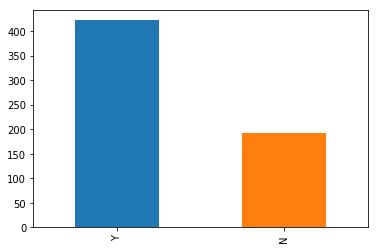

In [10]:
train_data['Loan_Status'].value_counts().plot.bar()

After visualising Loan status we can see

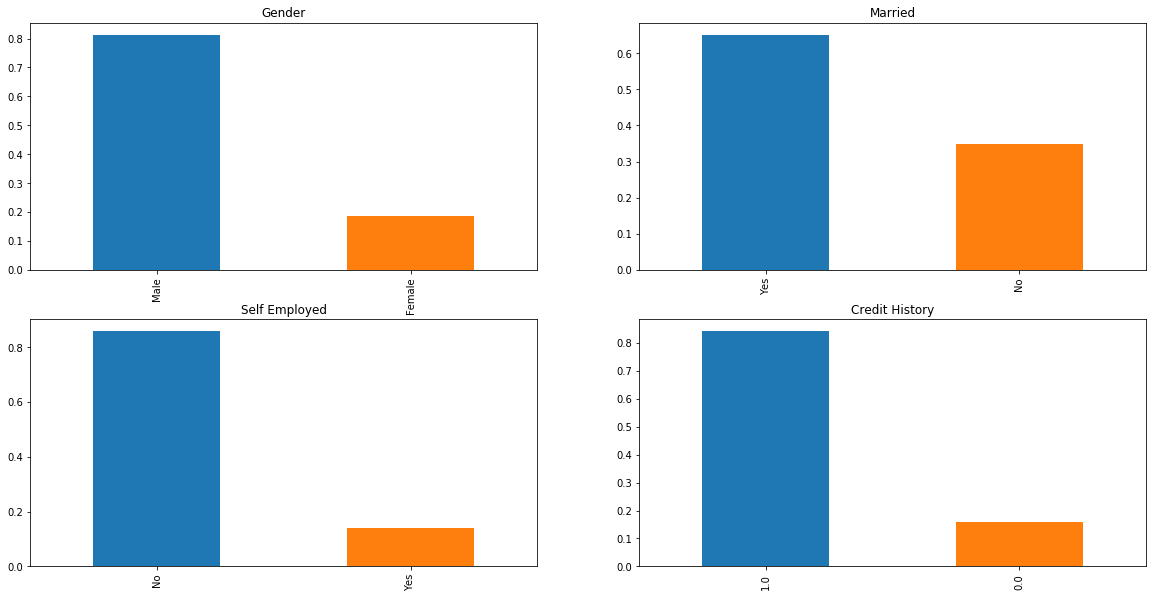

In [11]:
plt.figure(1)
plt.subplot(2,2,1)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(2,2,2)
train_data['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(2,2,3)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')

plt.subplot(2,2,4)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit History')

plt.show()

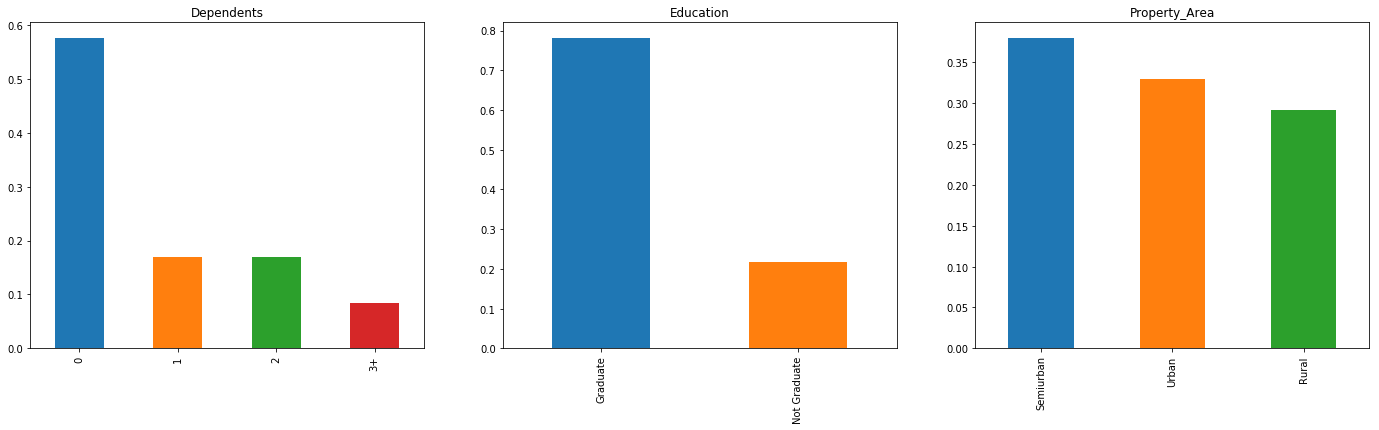

In [12]:
plt.figure(1)
plt.subplot(131)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

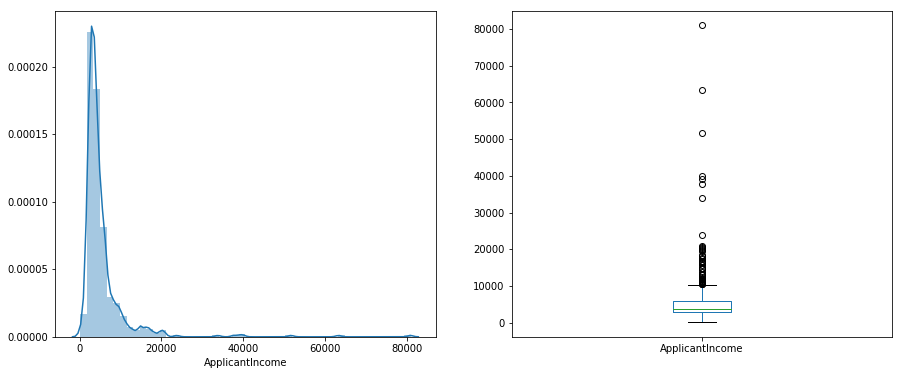

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome']);

plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(15,6))

plt.show()

<Figure size 432x288 with 0 Axes>

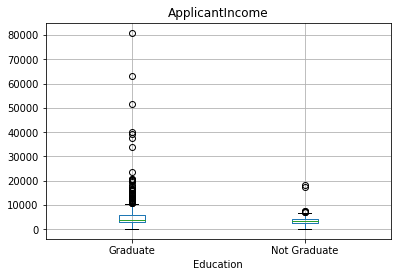

In [14]:
plt.figure(1)
train_data.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')
plt.show()

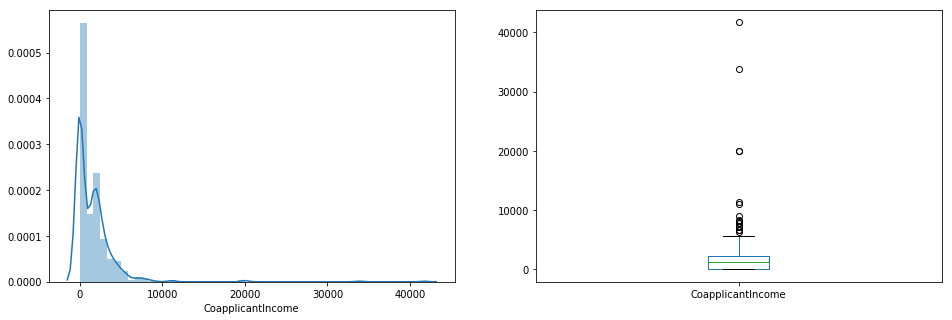

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome']);

plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

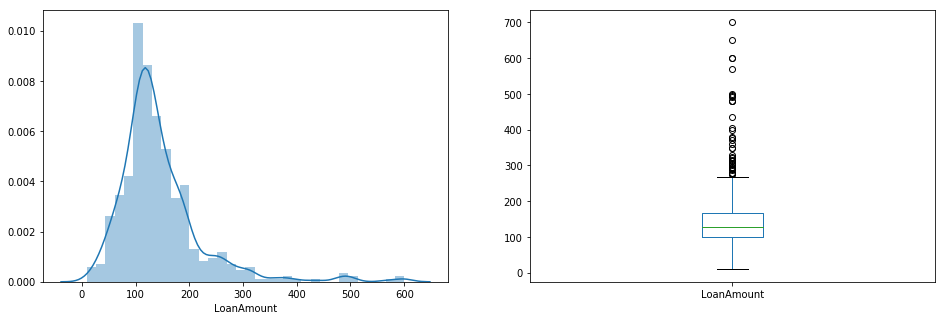

In [16]:
plt.figure(1)
plt.subplot(121)
df=train_data.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

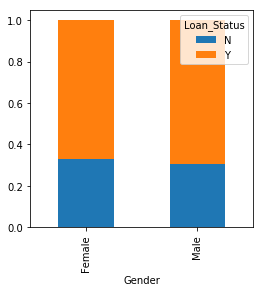

In [17]:
#Bivariate Analysis
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

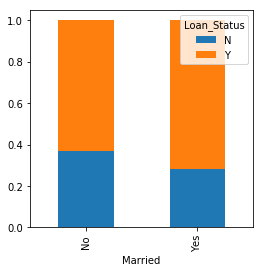

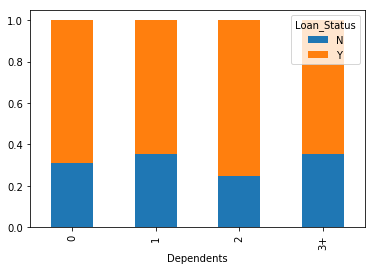

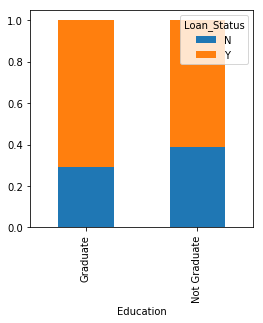

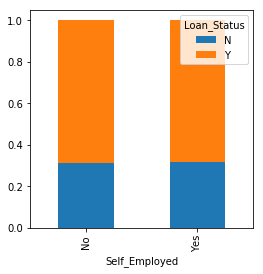

In [18]:
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

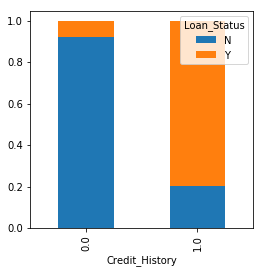

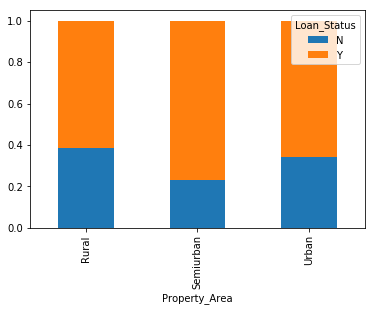

In [19]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

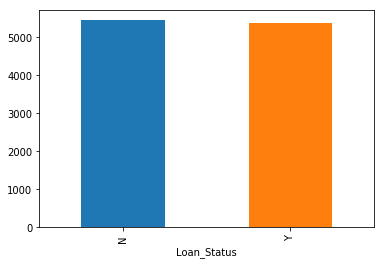

In [20]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

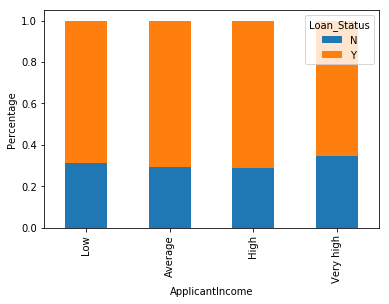

In [21]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

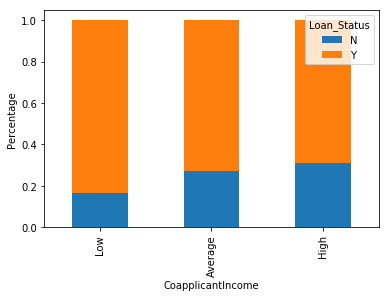

In [22]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_data['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

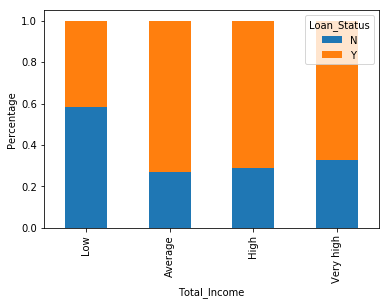

In [23]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

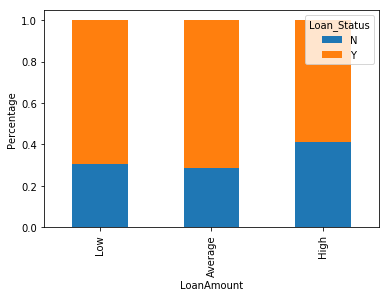

In [24]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_data['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [25]:
train_data=train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [26]:
train_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)
train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

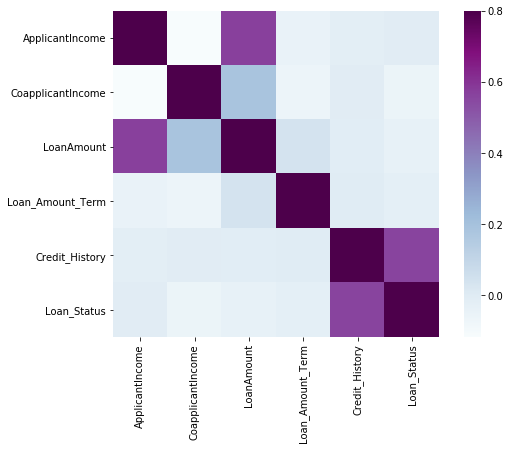

In [27]:
matrix = train_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu");

In [28]:
#Missing Values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [30]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [32]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [33]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

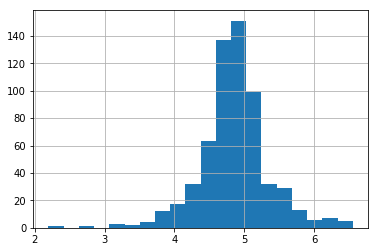

In [35]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [36]:
#Model Logistic Regression
train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

In [37]:
X = train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

In [38]:
X=pd.get_dummies(X)

In [39]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
pred_cv = classifier.predict(x_val)

In [44]:
accuracy_score(y_val,pred_cv)

0.8162162162162162

In [45]:
pred_test = classifier.predict(test_data)

In [46]:
submission = pd.read_csv('Sample.csv')

In [47]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [48]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [49]:
#logistic Regression using stratified k-folds cross validation
from sklearn.model_selection import StratifiedKFold
i = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    classifier = LogisticRegression(random_state=1)
    classifier.fit(xtr,ytr)
    pred_val = classifier.predict(xvl)
    score = accuracy_score(yvl,pred_val)
    print(score)
    print('accuracy score',score)
    i+=1
pred_test = classifier.predict(test_data)
pred = classifier.predict_proba(xvl)[:,1]


0 of kfold 5
0.7983870967741935
accuracy score 0.7983870967741935

1 of kfold 5
0.8306451612903226
accuracy score 0.8306451612903226

2 of kfold 5
0.8114754098360656
accuracy score 0.8114754098360656

3 of kfold 5
0.7950819672131147
accuracy score 0.7950819672131147

4 of kfold 5
0.8278688524590164
accuracy score 0.8278688524590164


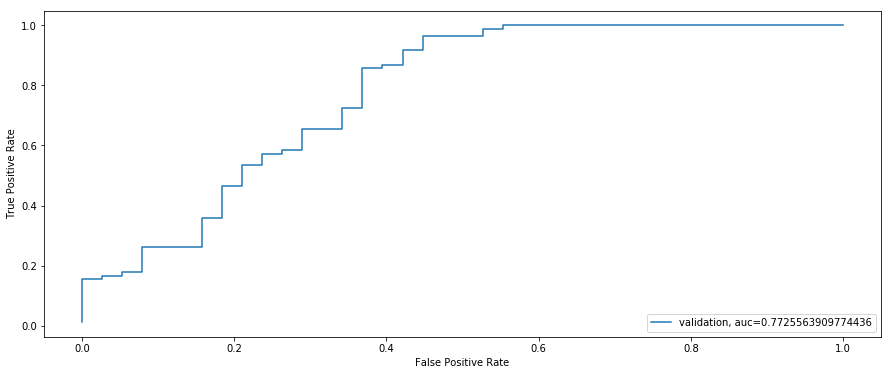

In [50]:
#Visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(15,6))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [52]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [53]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

# Feature Engineering

Using domain knowledge, we come up with some new features such as Total Income, EMI and Balance Income

In [54]:
#Total Income
train_data['Total_Income'] = train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['Total_Income'] = test_data['ApplicantIncome']+test_data['CoapplicantIncome']

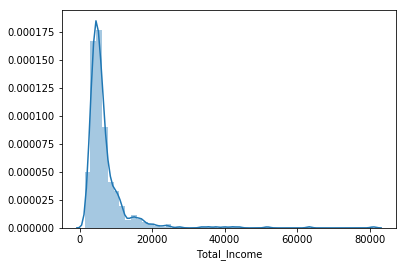

In [55]:
sns.distplot(train_data['Total_Income'])

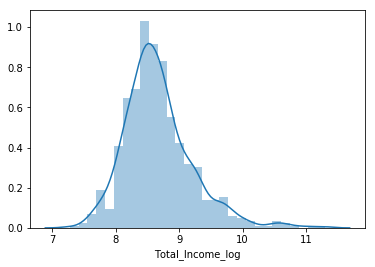

In [56]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

In [57]:
#EMI
train_data['EMI'] = train_data['LoanAmount']/train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['LoanAmount']/test_data['Loan_Amount_Term']

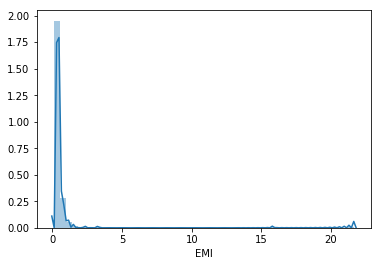

In [58]:
sns.distplot(test_data['EMI'])

In [63]:
#Balance Income
train_data['Balance_Income'] = train_data['Total_Income'] - (train_data['EMI']*1000)
test_data['Balance_Income'] = test_data['Total_Income'] - (test_data['EMI']*1000)

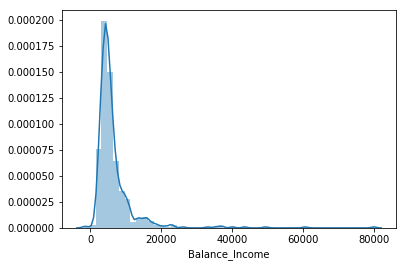

In [64]:
sns.distplot(train_data['Balance_Income'])

In [66]:
train_data = train_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test_data = test_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

# Model Building

# Logistic Regression

In [67]:
X = train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

In [77]:
i = 0
l=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    classifier = LogisticRegression(random_state=1)
    classifier.fit(xtr,ytr)
    pred_y = classifier.predict(xvl)
    score = accuracy_score(yvl,pred_y)
    l.append(score)
    print('accuracy_score',score)
    i+=1
pred_test = classifier.predict(test_data)
pred = classifier.predict_proba(xvl)[:,1]


0 kfold 5
accuracy_score 0.8064516129032258

1 kfold 5
accuracy_score 0.8306451612903226

2 kfold 5
accuracy_score 0.7786885245901639

3 kfold 5
accuracy_score 0.7868852459016393

4 kfold 5
accuracy_score 0.819672131147541


In [79]:
np.mean(l) #Average accuracy score

0.8044685351665786

In [80]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [82]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [83]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

# Decision Tree

In [84]:
from sklearn import tree

In [85]:
i = 0 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
l=[]
for train_index,test_index in kf.split(X,y):
    print('\n{} kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y.loc[train_index],y.loc[test_index]
    
    classifier = tree.DecisionTreeClassifier(random_state=1)
    classifier.fit(xtr,ytr)
    pred_vl = classifier.predict(xvl)
    score = accuracy_score(yvl,pred_vl)
    l.append(score)
    print('accuracy_score',score)
    i+=1
pred_test = classifier.predict(test_data)


0 kfold 5
accuracy_score 0.7258064516129032

1 kfold 5
accuracy_score 0.7419354838709677

2 kfold 5
accuracy_score 0.7049180327868853

3 kfold 5
accuracy_score 0.680327868852459

4 kfold 5
accuracy_score 0.7049180327868853


In [86]:
np.mean(l)

0.7115811739820201

In [87]:
submission['Loan_Status']=pred_test            
submission['Loan_ID']=test_original['Loan_ID']

In [88]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [89]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
i=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
l=[]
for train_index,test_index in kf.split(X,y):
    print('\n{} kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y.loc[train_index],y.loc[test_index]
    
    classifier = RandomForestClassifier(random_state=1,max_depth=10)
    classifier.fit(xtr,ytr)
    pred_vl = classifier.predict(xvl)
    score = accuracy_score(yvl,pred_vl)
    print('accuracy_score',score)
    l.append(score)
    i+=1
pred_test = classifier.predict(test_data)


0 kfold 5
accuracy_score 0.8225806451612904

1 kfold 5
accuracy_score 0.8145161290322581

2 kfold 5
accuracy_score 0.7377049180327869

3 kfold 5
accuracy_score 0.7295081967213115

4 kfold 5
accuracy_score 0.8114754098360656


In [93]:
np.mean(l)

0.7831570597567425